In [1]:
import numpy as np
import sys
sys.path.insert(1,'../../src')
from _generate_time_series import *
from _shear_frame import *
from utils_OB import *
from _clustering import *
import _tracking as tk
from utils_JK import *
import seaborn as sns
sns.set_theme(context='paper',font_scale=1.0, style = 'ticks', color_codes='deep')

%load_ext autoreload
%autoreload 2

In [4]:
data_true = np.load('./test_results/test_3_true.npz',allow_pickle=True)
true_f = data_true['arr_0']
true_phi = data_true['arr_1']

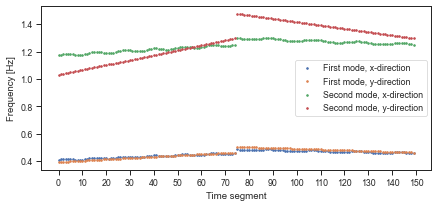

In [4]:
fig, axs = plt.subplots(figsize = (7,3))


axs.scatter(np.arange(0, 150, 1), true_f[:,1], label = 'First mode, x-direction', s = 3)
axs.scatter(np.arange(0, 150, 1), true_f[:,0], label = 'First mode, y-direction', s = 3)
axs.scatter(np.arange(0, 150, 1), true_f[:,3], label = 'Second mode, x-direction', s = 3)
axs.scatter(np.arange(0, 150, 1), true_f[:,2], label = 'Second mode, y-direction', s = 3)

axs.set_xticks(np.arange(0, 151, 10))
axs.set_xlabel('Time segment')
axs.set_ylabel('Frequency [Hz]')
axs.legend()

In [5]:
true_f_flipped = np.empty_like(true_f)
true_phi_flipped = np.empty_like(true_phi)

n = true_f.shape[0]

true_f_flipped[:n//2,:] = true_f[n//2:,:]
true_f_flipped[n//2:,:] = true_f[:n//2,:]

true_phi_flipped[:,:,:n//2] = true_phi[:,:,n//2:]
true_phi_flipped[:,:,n//2:] = true_phi[:,:,:n//2]

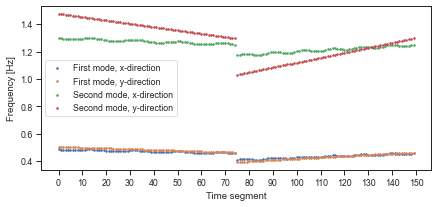

In [15]:
fig, axs = plt.subplots(figsize = (7,3))

axs.scatter(np.arange(0, 150, 1), true_f_flipped[:,1], label = 'First mode, x-direction', s = 3)
axs.scatter(np.arange(0, 150, 1), true_f_flipped[:,0], label = 'First mode, y-direction', s = 3)
axs.scatter(np.arange(0, 150, 1), true_f_flipped[:,3], label = 'Second mode, x-direction', s = 3)
axs.scatter(np.arange(0, 150, 1), true_f_flipped[:,2], label = 'Second mode, y-direction', s = 3)

axs.set_xticks(np.arange(0, 151, 10))
axs.set_xlabel('Time segment')
axs.set_ylabel('Frequency [Hz]')
axs.legend()

In [19]:
phi00 = true_phi_flipped[0,:,0]
phi10 = true_phi_flipped[1,:,0]
phi20 = true_phi_flipped[2,:,0]
phi30 = true_phi_flipped[3,:,0]

mac0 = np.zeros(149)
mac1 = np.zeros(149)
mac2 = np.zeros(149)
mac3 = np.zeros(149)

for i, k in enumerate(np.arange(1,150)):
    mac0[i] = MAC(phi00, true_phi_flipped[0,:,k])
    mac1[i] = MAC(phi10, true_phi_flipped[1,:,k])
    mac2[i] = MAC(phi20, true_phi_flipped[2,:,k])
    mac3[i] = MAC(phi30, true_phi_flipped[3,:,k])

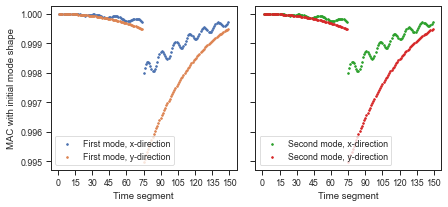

In [20]:
fig = plt.figure(figsize=(7,3))
gs = fig.add_gridspec(1,2, wspace=0.1)
ax = gs.subplots(sharex=True, sharey=True)

ax[0].scatter(np.arange(1, 150), mac1, label = 'First mode, x-direction', s = 3)
ax[0].scatter(np.arange(1, 150), mac0, label = 'First mode, y-direction', s = 3)
ax[1].scatter(np.arange(1, 150), mac3, label = 'Second mode, x-direction', color = 'tab:green', s = 3)
ax[1].scatter(np.arange(1, 150), mac2, label = 'Second mode, y-direction', color = 'tab:red', s = 3)

ax[0].set_xticks(np.arange(0, 151, 15))
ax[0].set_xlabel('Time segment')
ax[0].set_ylabel('MAC with initial mode shape')

ax[0].legend(loc='lower left')

ax[1].set_xticks(np.arange(0, 151, 15))
ax[1].set_xlabel('Time segment')

ax[1].legend(loc='lower left')

In [21]:
np.savez('./test_results_flipped/test_3_true_flipped',true_f_flipped,true_phi_flipped)

In [6]:
for i in range(50):
    datai = np.load('./test_results/test_3_run_'+str(i)+'.npz',allow_pickle=True)
    freqs_outi = datai['arr_0']
    phis_outi = datai['arr_1']

    freqs_out_flippedi = []
    phis_out_flippedi = []

    for k in range(n//2):
        freqs_out_flippedi.append(freqs_outi[k + n//2])
        phis_out_flippedi.append(phis_outi[k + n//2])

        
    for k in range(n//2, n):
        freqs_out_flippedi.append(freqs_outi[k - n//2])
        phis_out_flippedi.append(phis_outi[k - n//2])

    np.savez('./test_results_flipped/test_3_run_'+str(i)+'_flipped',freqs_out_flippedi,phis_out_flippedi)

c:\Users\jonkr\anaconda3\lib\site-packages\numpy\core\_asarray.py:171: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order, subok=True)


In [35]:
data = np.load('./test_results/test_3_run_'+str(0)+'.npz',allow_pickle=True)
freqs_out = data['arr_0']
phis_out = data['arr_1']

In [36]:
freqs_out_flipped = []
phis_out_flipped = []

for k in range(n//2):
    freqs_out_flipped.append(freqs_out[k + n//2])
    phis_out_flipped.append(phis_out[k + n//2])

    
for k in range(n//2, n):
    freqs_out_flipped.append(freqs_out[k - n//2])
    phis_out_flipped.append(phis_out[k - n//2])

In [37]:
print(freqs_out_flipped[-1])
print('-----------')
print(np.real(phis_out_flipped[-1]))

[0.46967277 1.25293988 1.29657657]
-----------
[[-0.10596419 -0.16198665  0.62510362  0.90398856]
 [ 0.99996503 -0.64779368 -0.04747804  0.02228586]
 [ 0.03777642 -0.01921164 -0.99932436  0.66486831]]


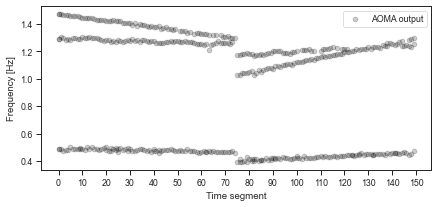

In [38]:
fig, axs = plt.subplots(figsize = (7,3))

# for i, trace in enumerate(mode_traces_magalhaes_above):
#     axs.scatter(trace.time_seg, trace.frequencies, label = 'Mode trace {}'.format(i))

for k, freq in enumerate(freqs_out_flipped):
    if k == 0: axs.scatter(np.ones_like(freq)*k, freq, color = 'black', alpha=0.2, label = 'AOMA output')
    axs.scatter(np.ones_like(freq)*k, freq, color = 'black', alpha=0.2)

axs.set_xticks(np.arange(0, 151,10))
axs.set_xlabel('Time segment')
axs.set_ylabel('Frequency [Hz]')
axs.legend()
